# Uitleg van een simpel SIR model

In [6]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

     |████████████████████████████████| 11.5 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 24.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 28.3 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 6.6 MB/s eta 0:00:01     |██████████████████▉             | 16.1 MB 6.6 MB/s eta 0:00:02


Hoewel het uiteindelijke model veel gecompliceerder is, kan je het beter begrijpen als je bij de basis begint. Daarom ga ik uitleggen hoe die werkt

Eerst moeten we belangrijke modules importeren die ervoor zorgen dat we functies kunnen uitvoeren die niet in de basis versie zit van Pythhon

In [7]:
# importeren van belangrijke functies in het programma
import numpy as np  # module met cijfer verwerking
import matplotlib.pyplot as plt  # module voor grafische weergave
from scipy.integrate import odeint  # module voor integreren

Een belangrijk deel van het SIR model is differentiëren. Je gebruikt namelijk de eerste afgeleide van de S, I en R lijnen. Daarmee weet de computer de helling van de grafiek en kan het een lijn tekenen.

In [8]:
# een functie voor het berekenen van de afgeleides van S, I en R
def derivative(z, t, N, beta, gamma):     # creatie van een functie
    S, I, R = z                           # configuratie van de startwaarden van S, I en R
    dSdt = -beta * S * I / N              # de afgeleides van S, I en R zijn gegeven met deze formules
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt               # dit geeft aan dat de functie alleen de afgeleides van S, I en R uitvoert

tot slot is er nog een functie die de waardes op een grafiek neer zet en vervolgens die grafiek als output heeft. deze is redelijk lang, dus ik verdeel het over meerdere stukken met uitleg

In [9]:
# een functie voor het plotten van het model 
def model(N, beta, D, starting_cond: "Tuple of 3", days):            # creatie van de functie
    gamma = 1.0 / D                                                  # de formule voor de berekening van de gamma waarde
    z0 = starting_cond                                               # stelt de beginwaardes van z gelijk aan de functie input
    t = np.linspace(0, days - 1, days)                               # dit geeft het domein aan van de functie namelijk t van tijd
    intergral_t = odeint(derivative, z0, t, args=(N, beta, gamma))   # met de odeint functie kan je de afgeleides primitiveren tot de respectievelijke lijnen
    S, I, R = intergral_t.T                                          # dit zet S, I en R gelijk aan de waardes van de primitivatie

    """
       in het volgende deel wordt een plot gecreeërd waar de grafiek in wordt getekend
       ook wordt hierin de lijnen geplot
    """
    f, ax = plt.subplots(1, 1, figsize=(10, 5))                      # creeërt een plot waar in getekend kan worden
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Vatbaar')      # maakt de lijn voor S
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Geïnfecteerd') # maakt de lijn voor I 
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Genezen')      # maakt de lijn voor R
    ax.set_xlabel('Tijd in dagen')                                   # geeft een naam aan de x-as

    """
       dit maakt een rooster en een legenda 
    """
    ax.grid(b=True, which='both', c='gray', lw=1, ls='-')            # dit creeërt een rooster 
    legend = ax.legend()                                             # dit maakt de legenda
    legend.get_frame().set_alpha(0.7)                                # dit zorgt dat de legenda 70% ondoorzichtig is
    for spine in ('top', 'right', 'bottom', 'left'):                 # dit is een loop die alle grenzen van de grafiek
        ax.spines[spine].set_visible(False)                          # niet zichtbaar maakt omdat ik dat mooier vind
    plt.show()                                                       # dit laat de plot zien

tot slot moeten we de functie nog 'aanzetten' door de parameters in te voeren. Voor N (de populatie) heb ik een waarde van 16.000.000 gebruikt. Beta (aantal personen per dag geïnfecteerd per patiënt) heb ik 1.2 gekozen. Voor D (aantal dagen besmettelijk) heb ik 5.0 gekozen. Voor de starting_cond heb ik S = 15.999.999, I = 1 en R = 0, want we beginnen met een geïnfecteerd persoon. Voor days (het aantal dagen dat het model berekent) heb ik 50 dagen gekozen.


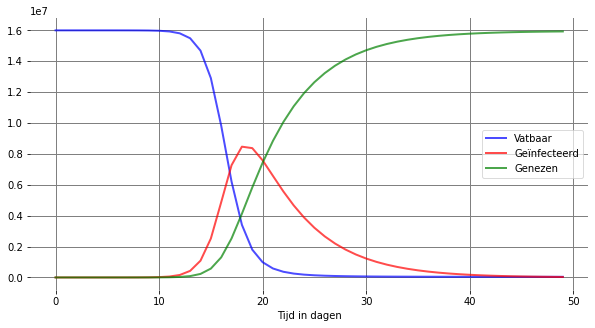

In [10]:
model(16000000, 1.2, 5.0, (15999999, 1, 0), 50)

Hier onder gebruik ik wat andere variabelen om te laten zien wat er gebeurt in de grafieken. Wees niet bang om zelf ook de Beta en D waardes te veranderen!

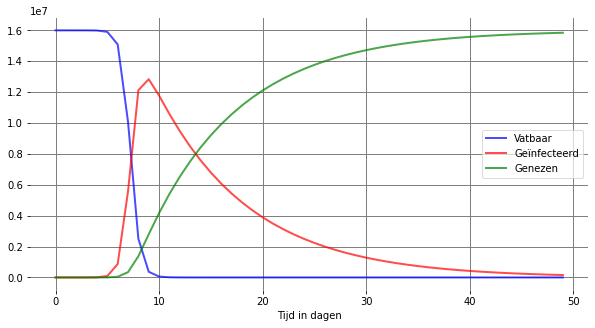

In [11]:
model(16000000, 2.4, 9, (15999999, 1, 0), 50)

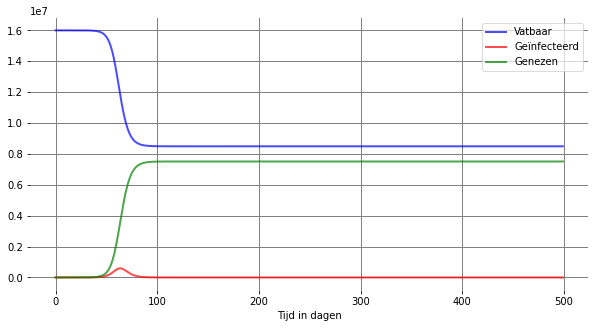

In [15]:
model(16000000, 0.9, 1.5, (15999999, 1, 0), 500)